https://towardsdatascience.com/random-forests-algorithm-explained-with-a-real-life-example-and-some-python-code-affbfa5a942c

Random Forest is a ML algorithm that tackles one of the biggest problems with **Decision Trees**: VARIANCE.

Decision Trees is simple and flexible but it is a greedy algorithm.

It focuses on optimizing for the node split at hand rather than taking into account how that split impacts the entire tree.

A greedy approcach makes Decision Trees run faster, but makes it prone **overfitting**.

## Bootstrapping

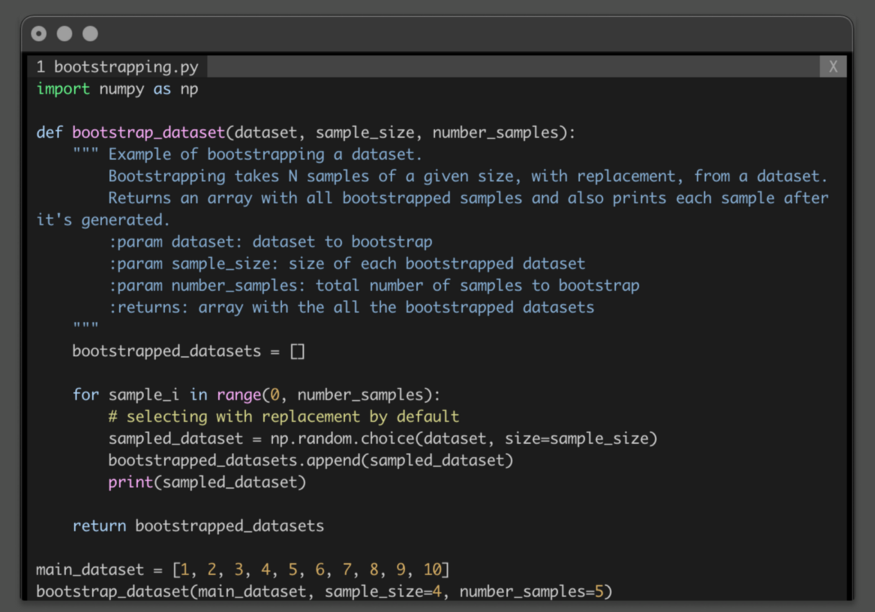

The reason why Bootstrapping works is because you’re sampling with replacement.
You can pick the same datapoint multiple times, like in the last two samples, but each sampled dataset is slightly different from the previous one.

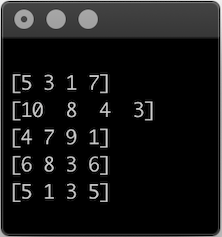

## Advantages of Random Forest

- shares all advantages of Decision Trees - is data robust, handles different types of data and doesnt require any data preprocessing

- each mdel is different

- you can use the entire dataset to train and evaluate the model. very good for small datasets

## EXERCISE

Whenever you start planning a vacation, you always take into account:
- Duration of the vacation,
- Personal budget,
- Weather forecast,
- If your extended family is joining,
- If you’re feeling adventurous and want to explore new places.

#### Single Decision Tree

In [2]:
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [8]:
def encode_features(array):
    encoder = preprocessing.LabelEncoder().fit(array)
    return encoder.transform(array)

def build_decision_tree(features, targets):
    train_features, test_features, train_targets, test_targets = train_test_split(features, targets,
                                                                                 test_size=0.2, random_state=123)
    decision_tree = tree.DecisionTreeClassifier(random_state=456)
    decision_tree.fit(train_features, train_targets)
    
    print("Test Set Mean Squared Error = ", str(np.round(1 - decision_tree.score(test_features, test_targets), 2)))

In [9]:
features = np.array([[10, 'Yes', 950, 75, 'Yes'], [10, 'Yes', 250, 78, 'Yes'], [7, 'Yes', 600, 80, 'No'],
                    [8, 'Yes', 750, 67, 'Yes'], [10, 'Yes', 800, 73, 'Yes'], [8, 'Yes', 850, 64, 'Yes'],
                    [15, 'No', 350, 78, 'No'], [8, 'Yes', 850, 81, 'Yes'], [6, 'No', 750, 59, 'Yes'],
                   [12, 'Yes', 1050, 75, 'Yes'], [10, 'No', 230, 74, 'No'], [3, 'Yes', 630, 74, 'Yes'],
                   [10, 'Yes', 830, 75, 'No'], [12, 'No', 730, 52, 'Yes'], [4, 'Yes', 830, 67, 'No']])

targets = np.array(['Countryside', 'Beach', 'Beach', 'Countryside', 'Beach', 'Countryside', 'Beach', 'Countryside',
                   'Beach', 'Beach', 'Countryside', 'Countryside', 'Beach', 'Beach', 'Beach'])

In [10]:
features[:, 1] = encode_features(features[:, 1])
features[:, 4] = encode_features(features[:, 4])
targetes = encode_features(targets)

build_decision_tree(features, targets)

Test Set Mean Squared Error =  0.67


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

def build_random_forest(features, targets):
    random_forest = RandomForestClassifier(random_state=4567, bootstrap=True, oob_score=True)
    random_forest.fit(features, targets)
    
    oob_error = np.round(random_forest.oob_score_, 2)
    print("Random Forest with ",  str(len(random_forest.estimators_)), " trees has OOB Error: ", str(oob_error))

In [20]:
features = np.array([[10, 'Yes', 950, 75, 'Yes'], [10, 'Yes', 250, 78, 'Yes'], [7, 'Yes', 600, 80, 'No'],
                    [8, 'Yes', 750, 67, 'Yes'], [10, 'Yes', 800, 73, 'Yes'], [8, 'Yes', 850, 64, 'Yes'],
                    [15, 'No', 350, 78, 'No'], [8, 'Yes', 850, 81, 'Yes'], [6, 'No', 750, 59, 'Yes'],
                   [12, 'Yes', 1050, 75, 'Yes'], [10, 'No', 230, 74, 'No'], [3, 'Yes', 630, 74, 'Yes'],
                   [10, 'Yes', 830, 75, 'No'], [12, 'No', 730, 52, 'Yes'], [4, 'Yes', 830, 67, 'No']])

targets = np.array(['Countryside', 'Beach', 'Beach', 'Countryside', 'Beach', 'Countryside', 'Beach', 'Countryside',
                   'Beach', 'Beach', 'Countryside', 'Countryside', 'Beach', 'Beach', 'Beach'])

In [21]:
features[:, 1] = encode_features(features[:, 1])
features[:, 4] = encode_features(features[:, 4])
targetes = encode_features(targets)

build_random_forest(features, targets)

Random Forest with  100  trees has OOB Error:  0.47


## Find the optimal number of trees

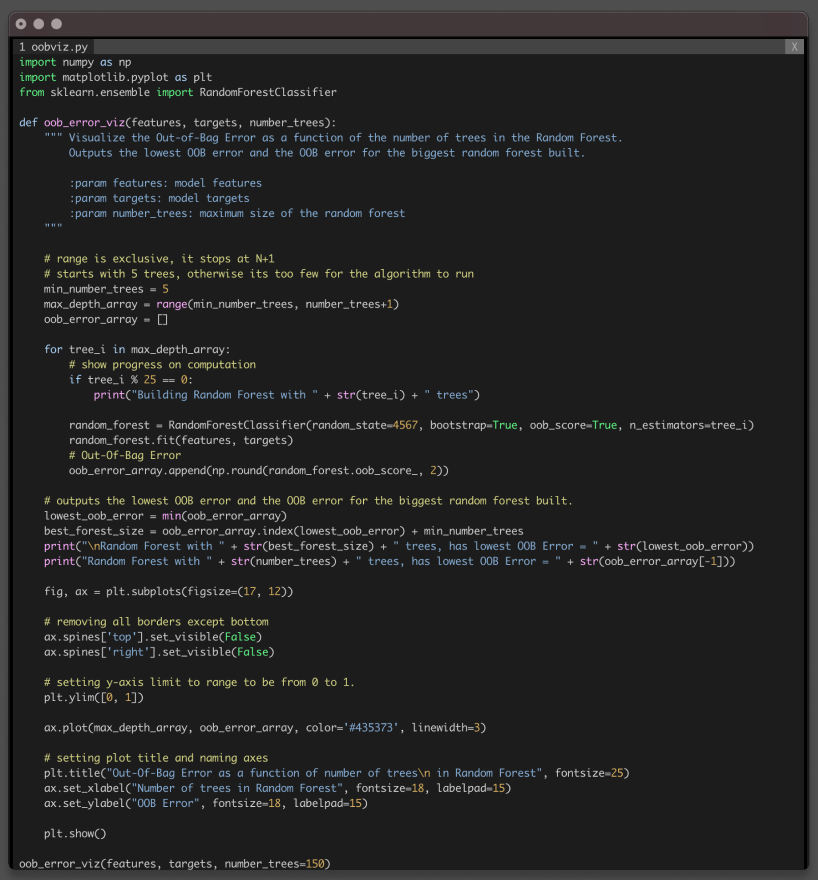